In [ ]:
#Project by: NASR Ricardo, BODIN Kevin , BARAKAT Mohamad, RAVELOMANANTSOA Martin, HALAWANI Diana, TALEB AL AJOUZ Amer

In [ ]:
  # Dataset: Auto-Arborist 
# TensorFlow and tf.keras
import tensorflow as tf
#import tensorflow_datasets as tfds # Needed to use tensorflow dataset

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
import seaborn as sns
from tensorflow.keras.optimizers import SGD
# Line below is for convonutianal functions and layers. Maxpooling to reduce the size. 
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout

2.11.0


In [ ]:
data_cfar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = data_cfar.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# 10 classes available in the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# Convert to numpy array for the plot to work
class_names = np.array(class_names)

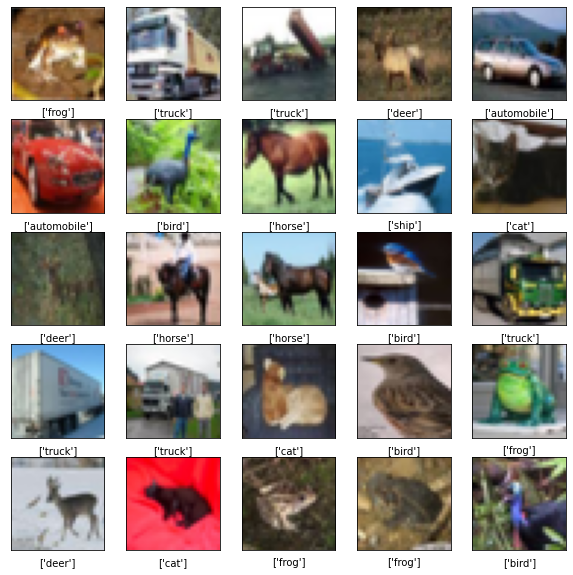

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images.shape 
#50,000 images

(50000, 32, 32, 3)

In [ ]:
train_labels.shape

(50000, 10)

In [ ]:
# Standardize images - normalizing the training data 
train_images = train_images / 255.0 

test_images = test_images / 255.0

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Configuration 1



In [ ]:
# 1 layer with 32 neurons
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
	# Then we compile the model
	opt = SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history=model.fit(train_images, train_labels, epochs=8)
 # After 8 epochs, the training accuracy is 81%

Epoch 1/8
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5465 - accuracy: 0.4443
Epoch 2/8
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2235 - accuracy: 0.5697
Epoch 3/8
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0890 - accuracy: 0.6166
Epoch 4/8
1563/1563 [==============================] - 30s 19ms/step - loss: 0.9735 - accuracy: 0.6560
Epoch 5/8
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8840 - accuracy: 0.6872
Epoch 6/8
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7942 - accuracy: 0.7194
Epoch 7/8
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7051 - accuracy: 0.7526
Epoch 8/8
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6171 - accuracy: 0.7837


In [ ]:
  test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
# The test accuracy is 62.7%

313/313 - 2s - loss: 1.2447 - accuracy: 0.6272 - 2s/epoch - 6ms/step

Test accuracy: 0.6272000074386597


Training accuracy = 81% <br>
Testing accuracy = 62.7% <br>
Model to be improved


In [ ]:
# Model 1 Metrics 

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# assuming you have a trained model 'model' and test data 'test_images' and 'test_labels'
y_pred = model.predict(test_images)

313/313 [==============================] - 2s 6ms/step


In [ ]:
# Calculate the precision of the model
y_pred = (y_pred > 0.5) # Define the threshold

precision = precision_score(test_labels, y_pred, average='micro')
print("Precision:", precision)

Precision: 0.6857483601669648


In [ ]:
# Calculate the recall
recall = recall_score(test_labels, y_pred, average='micro')
print("Recall:", recall)

Recall: 0.575


In [ ]:
# Calculate the F1-Score
f1 = f1_score(test_labels, y_pred, average='micro')
print("F1 Score:", f1)

F1 Score: 0.6255099265705739


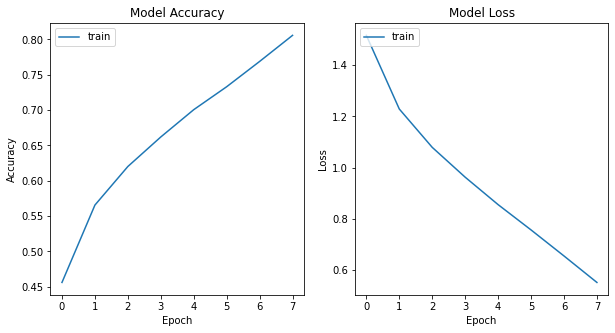

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(history.history['accuracy'])
#ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history.history['loss'])
#ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

We can see that with increasing the number of epochs, our accuracy increases as well. Also loss decreases with when we have a higher number of epochs

In [ ]:
y_true_single_label = np.argmax(test_labels, axis=1)
y_pred_single_label = np.argmax(y_pred, axis=1)

# compute confusion matrix
cm=confusion_matrix(y_true_single_label, y_pred_single_label)

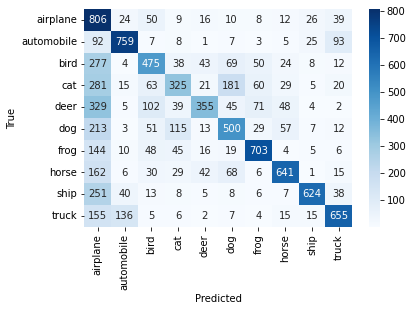

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Configuration 2 
*increase number of neurons in input layer*

In [ ]:
# 1 layer with 128 neurons
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
	# Then we compile the model
	opt = SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_2 = model.fit(train_images, train_labels, epochs=8)
 

Epoch 1/8
1563/1563 [==============================] - 89s 57ms/step - loss: 1.4795 - accuracy: 0.4789
Epoch 2/8
1563/1563 [==============================] - 88s 57ms/step - loss: 1.1501 - accuracy: 0.5951
Epoch 3/8
1563/1563 [==============================] - 86s 55ms/step - loss: 1.0125 - accuracy: 0.6446
Epoch 4/8
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9238 - accuracy: 0.6781
Epoch 5/8
1563/1563 [==============================] - 88s 56ms/step - loss: 0.8327 - accuracy: 0.7057
Epoch 6/8
1563/1563 [==============================] - 87s 55ms/step - loss: 0.7460 - accuracy: 0.7372
Epoch 7/8
1563/1563 [==============================] - 90s 58ms/step - loss: 0.6648 - accuracy: 0.7646
Epoch 8/8
1563/1563 [==============================] - 87s 55ms/step - loss: 0.5809 - accuracy: 0.7928


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
# This is the test accuracy

313/313 - 6s - loss: 1.2184 - accuracy: 0.6387 - 6s/epoch - 21ms/step

Test accuracy: 0.638700008392334


Training accuracy = 79 % <br>
Testing accuracy = 63 % <br>
Adding more filters to the convolutinal layer did not improve model learning


In [ ]:
# Model 2 Metrics 

# assuming you have a trained model 'model' and test data 'test_images' and 'test_labels'
y_pred = model.predict(test_images)

313/313 [==============================] - 4s 14ms/step


In [ ]:
# Calculate the precision of the model
y_pred = (y_pred > 0.5) # Define the threshold

precision = precision_score(test_labels, y_pred, average='micro')
print("Precision:", precision)

Precision: 0.6959715639810427


In [ ]:
# Calculate the recall
recall = recall_score(test_labels, y_pred, average='micro')
print("Recall:", recall)

Recall: 0.5874


In [ ]:
# Calculate the F1-Score
f1 = f1_score(test_labels, y_pred, average='micro')
print("F1 Score:", f1)

F1 Score: 0.6370932754880695


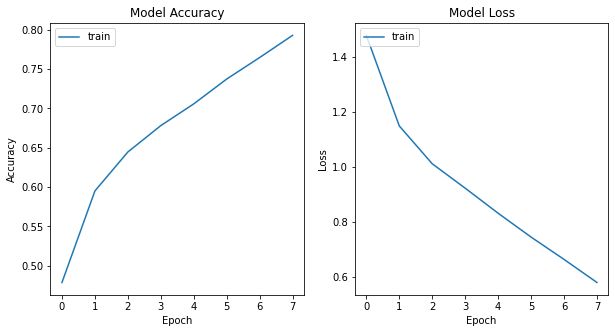

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(history_2.history['accuracy'])
#ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history_2.history['loss'])
#ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_true_single_label = np.argmax(test_labels, axis=1)
y_pred_single_label = np.argmax(y_pred, axis=1)

# compute confusion matrix
cm=confusion_matrix(y_true_single_label, y_pred_single_label)

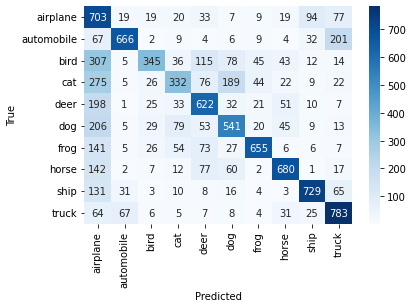

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Configuration 3
*add a convolutional layer*

In [ ]:
# 2 layers with 32 neurons each

model = Sequential()
# Convolutional Layer 1 
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# Convolutional Layer 2
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
# Flatten just before the classification
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
	# Then we compile the model
	opt = SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_3=model.fit(train_images, train_labels, epochs=6)
 

Epoch 1/6
1563/1563 [==============================] - 37s 23ms/step - loss: 1.5344 - accuracy: 0.4435
Epoch 2/6
1563/1563 [==============================] - 35s 23ms/step - loss: 1.2002 - accuracy: 0.5742
Epoch 3/6
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0556 - accuracy: 0.6269
Epoch 4/6
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9423 - accuracy: 0.6690
Epoch 5/6
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8508 - accuracy: 0.6998
Epoch 6/6
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7685 - accuracy: 0.7298


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
# This is the test accuracy

313/313 - 3s - loss: 1.0176 - accuracy: 0.6601 - 3s/epoch - 9ms/step

Test accuracy: 0.660099983215332


Training accuracy = 73 % <br>
Testing accuracy = 66 % <br>

In [ ]:
# Model 3 Metrics 

# assuming you have a trained model 'model' and test data 'test_images' and 'test_labels'
y_pred = model.predict(test_images)

313/313 [==============================] - 4s 12ms/step


In [ ]:
# Calculate the precision of the model
y_pred = (y_pred > 0.5) # Define the threshold

precision = precision_score(test_labels, y_pred, average='micro')
print("Precision:", precision)

Precision: 0.7414400805639476


In [ ]:
# Calculate the recall
recall = recall_score(test_labels, y_pred, average='micro')
print("Recall:", recall)

Recall: 0.589


In [ ]:
# Calculate the F1-Score
f1 = f1_score(test_labels, y_pred, average='micro')
print("F1 Score:", f1)

F1 Score: 0.6564868479714667


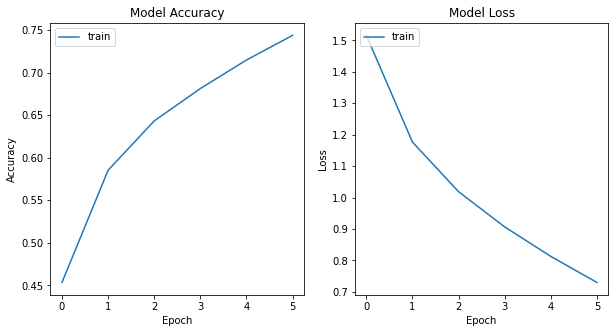

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(history_3.history['accuracy'])
#ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history_3.history['loss'])
#ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_true_single_label = np.argmax(test_labels, axis=1)
y_pred_single_label = np.argmax(y_pred, axis=1)

# compute confusion matrix
cm=confusion_matrix(y_true_single_label, y_pred_single_label)

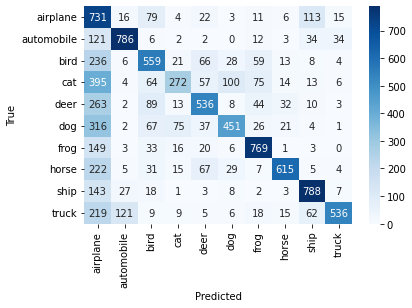

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Configuration 4
*Adjust the number of neurons*

In [ ]:
#2 layers: 1st layer with 32 neurons and 2nd layer with 64 neurons

model = Sequential()
# Convolutional Layer 1 
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
# Flatten just before the classification
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Then we compile the model
opt = SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_4 = model.fit(train_images, train_labels, epochs=8)
# We can stop at epoch 4
 

Epoch 1/8
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4733 - accuracy: 0.4689
Epoch 2/8
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0820 - accuracy: 0.6178
Epoch 3/8
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9157 - accuracy: 0.6802
Epoch 4/8
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7896 - accuracy: 0.7242
Epoch 5/8
1563/1563 [==============================] - 74s 47ms/step - loss: 0.6786 - accuracy: 0.7632
Epoch 6/8
1563/1563 [==============================] - 98s 63ms/step - loss: 0.5839 - accuracy: 0.7932
Epoch 7/8
1563/1563 [==============================] - 89s 57ms/step - loss: 0.4927 - accuracy: 0.8277
Epoch 8/8
1563/1563 [==============================] - 82s 53ms/step - loss: 0.4178 - accuracy: 0.8525


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
# This is the test accuracy

313/313 - 4s - loss: 1.1408 - accuracy: 0.6781 - 4s/epoch - 12ms/step

Test accuracy: 0.6780999898910522


Training accuracy = 85 % <br>
Testing accuracy = 67.8 % <br>

In [ ]:
# Model 4 Metrics 

# assuming you have a trained model 'model' and test data 'test_images' and 'test_labels'
y_pred = model.predict(test_images)


313/313 [==============================] - 5s 17ms/step


In [ ]:
# Calculate the precision of the model
y_pred = (y_pred > 0.5) # Define the threshold

precision = precision_score(test_labels, y_pred, average='micro')
print("Precision:", precision)


Precision: 0.7214053204624536


In [ ]:
# Calculate the recall
recall = recall_score(test_labels, y_pred, average='micro')
print("Recall:", recall)

Recall: 0.6427


In [ ]:
# Calculate the F1-Score
f1 = f1_score(test_labels, y_pred, average='micro')
print("F1 Score:", f1)

F1 Score: 0.6797821143370881


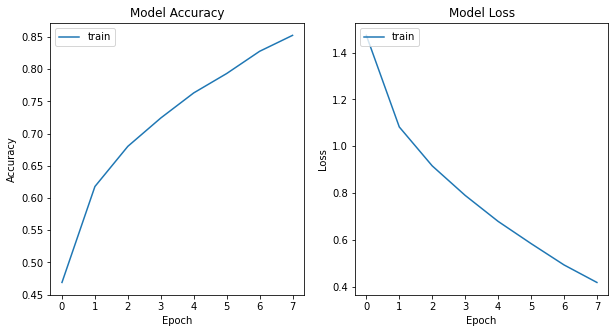

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(history_4.history['accuracy'])
#ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history_4.history['loss'])
#ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_true_single_label = np.argmax(test_labels, axis=1)
y_pred_single_label = np.argmax(y_pred, axis=1)

# compute confusion matrix
cm=confusion_matrix(y_true_single_label, y_pred_single_label)

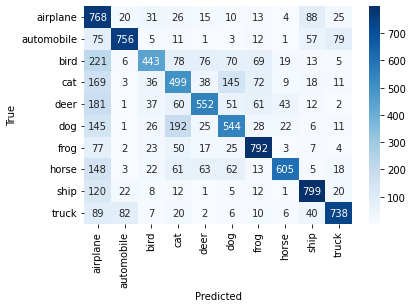

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Configuration 5
*Adjust the number of neurons*

In [ ]:
# 2 layers: 1st layer with 64 neurons and 2nd layer with 128 neurons

model = Sequential()
# Convolutional Layer 1 
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# Convolutional Layer 2
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
# Flatten just before the classification
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
	# Then we compile the model
	opt = SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history_5=model.fit(train_images, train_labels, epochs=6)
 

Epoch 1/6
1563/1563 [==============================] - 155s 99ms/step - loss: 1.2931 - accuracy: 0.5393
Epoch 2/6
1563/1563 [==============================] - 156s 99ms/step - loss: 0.9620 - accuracy: 0.6642
Epoch 3/6
1563/1563 [==============================] - 157s 101ms/step - loss: 0.7483 - accuracy: 0.7419
Epoch 4/6
1563/1563 [==============================] - 154s 99ms/step - loss: 0.5524 - accuracy: 0.8078
Epoch 5/6
1563/1563 [==============================] - 154s 99ms/step - loss: 0.3614 - accuracy: 0.8734
Epoch 6/6
1563/1563 [==============================] - 155s 99ms/step - loss: 0.2227 - accuracy: 0.9232


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
# This is the test accuracy

313/313 - 7s - loss: 1.0983 - accuracy: 0.7120 - 7s/epoch - 24ms/step

Test accuracy: 0.7120000123977661


Training accuracy = 92 % <br>
Testing accuracy = 71.2 % <br>

In [ ]:
# Model 5 Metrics 

# assuming you have a trained model 'model' and test data 'test_images' and 'test_labels'
y_pred = model.predict(test_images)


313/313 [==============================] - 7s 24ms/step


In [ ]:
# Calculate the precision of the model
y_pred = (y_pred > 0.5) # Define the threshold

precision = precision_score(test_labels, y_pred, average='micro')
print("Precision:", precision)

Precision: 0.7458749457229701


In [ ]:
# Calculate the recall
recall = recall_score(test_labels, y_pred, average='micro')
print("Recall:", recall)

Recall: 0.6871


In [ ]:
# Calculate the F1-Score
f1 = f1_score(test_labels, y_pred, average='micro')
print("F1 Score:", f1)

F1 Score: 0.7152821153445764


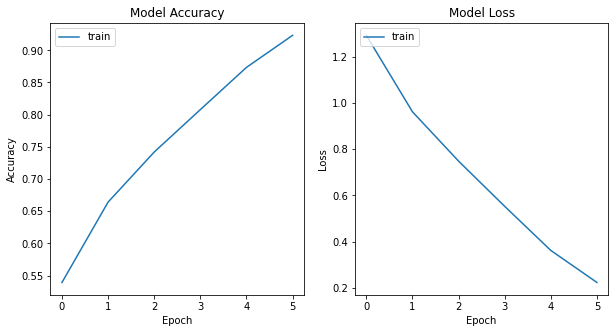

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(history_5.history['accuracy'])
#ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend(['train', 'test'], loc='upper left')
ax2.plot(history_5.history['loss'])
#ax2.plot(history.history['val_loss'])
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_true_single_label = np.argmax(test_labels, axis=1)
y_pred_single_label = np.argmax(y_pred, axis=1)

# compute confusion matrix
cm=confusion_matrix(y_true_single_label, y_pred_single_label)

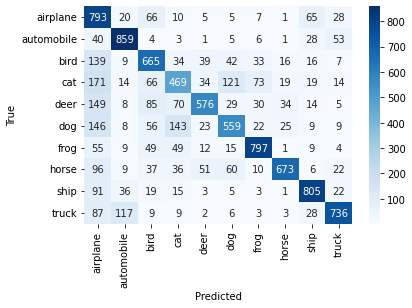

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()